In [1]:
import pandas as pd
import numpy as np

In [2]:
features = pd.read_csv("/Users/meiramzarypkanov/Desktop/University/4_Network_Security/Network_project/Network_security/NetworkSecurity_project/data/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")
ddos = pd.read_csv("/Users/meiramzarypkanov/Desktop/University/4_Network_Security/Network_project/Network_security/NetworkSecurity_project/data/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")


In [3]:
ddos.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [3]:
features.columns = features.columns.str.strip()
ddos.columns = ddos.columns.str.strip()

In [4]:
features.columns = features.columns.str.replace(' ', '_')
ddos.columns = ddos.columns.str.replace(' ', '_')


In [5]:
ddos = ddos.astype(features.dtypes.to_dict())


In [6]:
def same_schema(df1, df2):
    return df1.dtypes.equals(df2.dtypes)

print(same_schema(features, ddos))


True


In [7]:
features = features.dropna()

In [8]:
features = features[features['Label']=='BENIGN']

In [9]:
ddos = ddos[ddos['Label']!='BENIGN']

In [10]:
ddos.shape

(128027, 79)

In [11]:
features = features.head(128027)

In [12]:
features_final = pd.concat([features,ddos])

In [14]:
len(features_final.columns)

79

In [15]:
#ddos or not
features_final['Label'].nunique()

2

In [16]:
features_final

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128022,80,208693,11,7,549,310,78,73,61.161873,0.000000,...,78.932967,0.0,0.0,0.0,0.0,11512.634631,4241.585896,17684.159761,8998.108608,DDoS
128023,80,51511,10,12,437,11936,89,67,70.472848,10.263203,...,91.422351,0.0,0.0,0.0,0.0,10476.439656,3825.856861,21768.848053,8938.651654,DDoS
128024,80,208129,10,8,628,295,85,66,73.475997,0.000000,...,81.998139,0.0,0.0,0.0,0.0,14678.052338,3814.105309,18203.190381,8670.539411,DDoS
128025,80,45405,10,13,524,11955,95,79,64.913388,10.263203,...,80.361833,0.0,0.0,0.0,0.0,12877.866973,3761.239014,11962.195341,7896.665547,DDoS


In [17]:
features_final['Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [18]:
features_final

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128022,80,208693,11,7,549,310,78,73,61.161873,0.000000,...,78.932967,0.0,0.0,0.0,0.0,11512.634631,4241.585896,17684.159761,8998.108608,DDoS
128023,80,51511,10,12,437,11936,89,67,70.472848,10.263203,...,91.422351,0.0,0.0,0.0,0.0,10476.439656,3825.856861,21768.848053,8938.651654,DDoS
128024,80,208129,10,8,628,295,85,66,73.475997,0.000000,...,81.998139,0.0,0.0,0.0,0.0,14678.052338,3814.105309,18203.190381,8670.539411,DDoS
128025,80,45405,10,13,524,11955,95,79,64.913388,10.263203,...,80.361833,0.0,0.0,0.0,0.0,12877.866973,3761.239014,11962.195341,7896.665547,DDoS


In [19]:
features_final = features_final.dropna()

In [20]:
len(features_final)

199151

In [21]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import joblib

# Clean column names
features_final.columns = features_final.columns.str.replace(' ', '_')

# Split data: 90% train, 10% test (stratified)
train_df, test_df = train_test_split(
    features_final, test_size=0.1, stratify=features_final['Label'], random_state=42
)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['Label'])
y_test = label_encoder.transform(test_df['Label'])

# Features (exclude 'Label' and 'Destination_Port')
X_train = train_df.drop(columns=['Label', 'Destination_Port'])
X_test = test_df.drop(columns=['Label', 'Destination_Port'])

# Train simple LightGBM model
model = lgb.LGBMClassifier(
    num_leaves=31,
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluation
print(classification_report(y_test, model.predict(X_test)))

# Save model and encoder
base = '/Users/meiramzarypkanov/Desktop/University/4_Network_Security/Network_project/Network_security/NetworkSecurity_project/artifacts/'
joblib.dump(model, base + 'lightgbm_network_traffic_model.joblib')
joblib.dump(label_encoder, base + 'label_encoder.joblib')


[LightGBM] [Info] Number of positive: 115224, number of negative: 64011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15646
[LightGBM] [Info] Number of data points in the train set: 179235, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.642866 -> initscore=0.587823
[LightGBM] [Info] Start training from score 0.587823
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

['/Users/meiramzarypkanov/Desktop/University/4_Network_Security/Network_project/Network_security/NetworkSecurity_project/artifacts/label_encoder.joblib']

In [2]:
import joblib
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
model = joblib.load("/Users/meiramzarypkanov/Desktop/University/4_Network_Security/Network_project/Network_security/NetworkSecurity_project/artifacts/lightgbm_network_traffic_model.joblib")

In [8]:
# Get feature importances
importances = model.feature_importances_
feature_names = model.feature_name_
# Create DataFrame and sort
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Top 20 features
top_20 = feat_imp_df.head(20)
print(top_20)

                        Feature  Importance
0                 Flow_Duration         211
1             Total_Fwd_Packets         136
43               SYN_Flag_Count         100
3   Total_Length_of_Fwd_Packets          84
4   Total_Length_of_Bwd_Packets          33
2        Total_Backward_Packets          24
5         Fwd_Packet_Length_Max          21
7        Fwd_Packet_Length_Mean          21
18                 Flow_IAT_Min          11
13                 Flow_Bytes/s          10
11       Bwd_Packet_Length_Mean           8
8         Fwd_Packet_Length_Std           7
9         Bwd_Packet_Length_Max           7
6         Fwd_Packet_Length_Min           6
23                  Fwd_IAT_Min           6
20                 Fwd_IAT_Mean           5
16                 Flow_IAT_Std           5
15                Flow_IAT_Mean           4
21                  Fwd_IAT_Std           4
28                  Bwd_IAT_Min           4


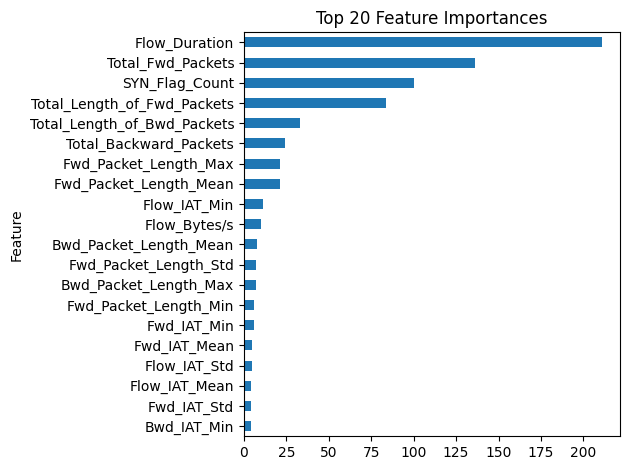

In [9]:
top_20.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

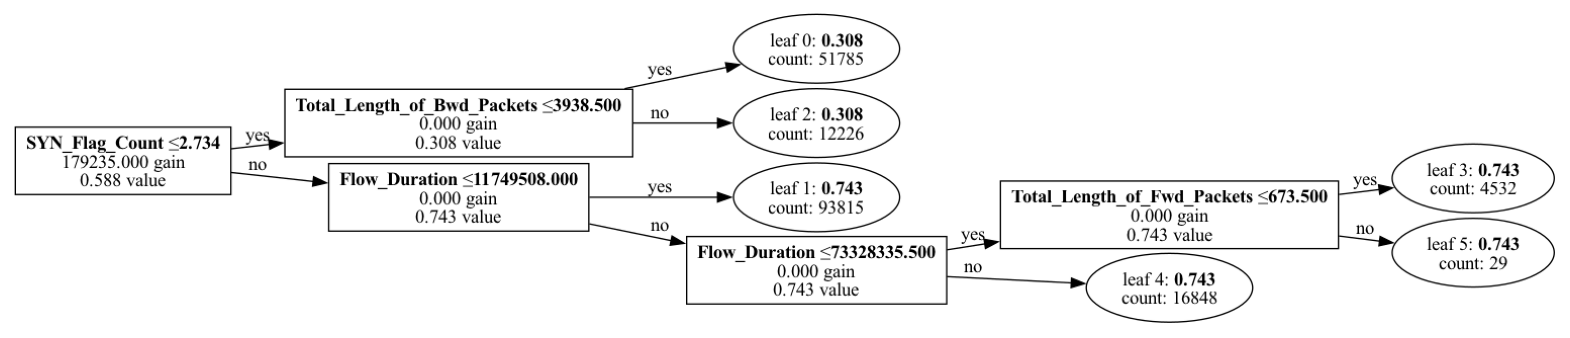

In [5]:
import lightgbm as lgb
ax = lgb.plot_tree(model, tree_index=0, figsize=(20, 10), show_info=['split_gain', 'internal_value', 'leaf_count'])
plt.show()

In [12]:
encoder = joblib.load("/Users/meiramzarypkanov/Desktop/University/4_Network_Security/Network_project/Network_security/NetworkSecurity_project/artifacts/label_encoder.joblib")
print("Classes:", encoder.classes_)

Classes: ['BENIGN' 'DDoS']
